## Random Forest Baseline Quickstart for NetML-Competition 2020

### * Loads datasets, plots confusion matrix, prints evaluation metrics on validation set and create submission JSON files

In [1]:
import os
import json
import argparse
import time as t
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from utils.helper import *

In [2]:
# Define function to create submissions
def do_submit(clf, test_set, scaler, class_label_pair, filepath):
    Xtest, ids = get_submission_data(test_set)
    X_test_scaled = scaler.transform(Xtest)
    print("Predicting on {} ...".format(test_set.split('/')[-1]))
    predictions = clf.predict(X_test_scaled)
    make_submission(predictions, ids, class_label_pair, filepath)   

In [3]:
# Modify only this cell:
# Note: anno = "mid" is valid ONLY with non-vpn2016 dataset
###
dataset = "./data/NetML" # or "./data/CICIDS2017" or "./data/non-vpn2016"
anno = "fine" # or "mid" or "fine"
submit = "both" # or "test-std" or "test-challenge"
###

In [4]:
# Assign variables
training_set = dataset+"/2_training_set"
training_anno_file = dataset+"/2_training_annotations/2_training_anno_"+anno+".json.gz"
test_set = dataset+"/1_test-std_set"
challenge_set = dataset+"/0_test-challenge_set"

In [18]:
# Create folder for the results
time_ = t.strftime("%Y%m%d-%H%M%S")

save_dir = os.getcwd() + '/results/' + time_
os.makedirs(save_dir)

In [6]:
# Get training data in np.array format
Xtrain, ytrain, class_label_pair, Xtrain_ids = get_training_data(training_set, training_anno_file)

# Split validation set from training data
X_train, X_val, y_train, y_val = train_test_split(Xtrain, ytrain,
                                                test_size=0.2, 
                                                random_state=42,
                                                stratify=ytrain)


Loading training set ...
Reading 2_training_set.json.gz


In [7]:
from sklearn.feature_selection import VarianceThreshold
# Get name of each class to display in confusion matrix
class_names = list(sorted(class_label_pair.keys()))

# Preprocess the data
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# selector = VarianceThreshold()
# X_train_scaled = selector.fit_transform(X_train_scaled)
# X_val_scaled = selector.fit_transform(X_val_scaled)

In [8]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs = -1, max_features="auto")
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [9]:
# Output accuracy of classifier
print("Training Score: \t{:.5f}".format(clf.score(X_train_scaled, y_train)))
print("Validation Score: \t{:.5f}".format(clf.score(X_val_scaled, y_val)))

Training Score: 	0.75982
Validation Score: 	0.75746


In [10]:
import warnings
warnings.filterwarnings('ignore')

# Compare Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from sklearn.linear_model.ridge import RidgeClassifierCV
from sklearn.linear_model.ridge import RidgeClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import NearestCentroid
from sklearn.mixture import GaussianMixture


from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import timeit


In [11]:

seed = 7
# prepare models
models = []


# models.append(('LR', LogisticRegression()))
# # models.append(('LRCV', LogisticRegressionCV()))
# models.append(('SDG', SGDClassifier()))
# models.append(('RidgeCV', RidgeClassifierCV()))
# models.append(('Ridge', RidgeClassifier()))
# models.append(('Perceptron', Perceptron()))
# models.append(('CART', DecisionTreeClassifier()))

# # NetML TOP,
# models.append(('ExtraTreesC', ExtraTreesClassifier()))
# models.append(('ExtraTreeC', ExtraTreeClassifier()))
# models.append(('GB', GradientBoostingClassifier()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('Quad', QuadraticDiscriminantAnalysis()))
# models.append(('MLP',MLPClassifier(max_iter=20)))
# models.append(('NB', GaussianNB()))
# models.append(('BernC', BernoulliNB()))
# # models.append(('CalibC', CalibratedClassifierCV()))
models.append(('NearC', NearestCentroid()))
models.append(('GaussianMixture', GaussianMixture()))
# evaluate each model in turn
results = []
confusion = []
names = []
scoring = 'accuracy'
print("We are good to go ->")
 
for name, model in models:
    start = timeit.default_timer()
    print("model:"+name)
#     kfold = model_selection.KFold(n_splits=10, random_state=None)
#     cv_results = model_selection.cross_val_predict(model, X_train_scaled, y_train, cv=kfold)
#     cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
#     y_pred = cross_val_predict(model, X_train_scaled, y_train, cv=10clf.fit(X_train_scaled, y_train)
    cv_results = model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    
    print("Training Score: \t{:.5f}".format(model.score(X_train_scaled, y_train)))
    print("Validation Score: \t{:.5f}".format(model.score(X_val_scaled, y_val)))
    confusion.append(y_pred)
    results.append(cv_results)
    names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)
    
    
    stop = timeit.default_timer()
    print('Time for model: ', stop - start) 
# boxplot algorithm comparison
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()

We are good to go ->
model:NearC
Training Score: 	0.44768
Validation Score: 	0.44728
Time for model:  1.2634430000000094
model:GaussianMixture
Training Score: 	-7.98767
Validation Score: 	-28.92050
Time for model:  6.294015399999992


In [13]:
# Print Confusion Matrix
# ypred = clf.predict(X_val_scaled)
index=1
for i in confusion:
    print("Algo number: "+str(index))
    conf_mat = confusion_matrix(y_true=y_val, y_pred=i)
#     print (conf_mat)
    index+=1
    
    
    # Plot normalized confusion matrix
#     plot_confusion_matrix(directory=save_dir, y_true=y_val, y_pred=i, 
#                             classes=class_names, 
#                             normalize=False)
# np.set_printoptions(precision=2)

# # Plot normalized confusion matrix
# plot_confusion_matrix(directory=save_dir, y_true=y_val, y_pred=ypred, 
#                         classes=class_names, 
#                         normalize=False)

Algo number: 1
[[2351    0    1    8    7    0    0    0    0    0    0    7    0    4
   680    0    0    0    0    0    0]
 [   0  981    0    1    0    0    0    0    0    0    0    0    0    0
     4    0    2    0  660    0    0]
 [ 396    0    0   11   72  171    0    0    0    0    3   29    0   10
   122    0    0    0    0    1    0]
 [ 858    0    0  175    5    0    8   26   11   12    0    0    0    4
   339    0  189    0    1    0    0]
 [  62    0    0    1   78    0    0    0    0    0    0    0    0    3
    94    0    0    0   38    0    0]
 [ 384    0    0   15    6  141    0    0    0    1    0   34    0    2
   179    0    0    0    7    1    0]
 [  54    0    0    3   83    0 1324  292    0    0    1    0    0    2
    83    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 6159 2512  508    2    0    0    0
     1    0    0    0    0    0    0]
 [  38    8    0    3   80    0  987   26 3322  655   12    0   39    5
    80  184  291    1  343    0  

Training Score: 	0.75982
Validation Score: 	0.75746
[[ 1932     0     0     5     0     0     0     0     0     0     1     0
      0     0     0  1002   111     0     0     6     1]
 [    1    92     0     0     0     0     0     0     2     0     0     0
      0     0     0     0     0     0  1549     0     4]
 [  262     0    40     6     0   104     0     0     8     0    23    12
      0     0     2   252     7    42     0    55     2]
 [  423     0     0   394     0     0     0     0     3     0     0     0
      0     0     5   564   120     0     0     6   113]
 [  156     0     2     1    34     0     1     0     7     0    13     0
      0     0     1     0     0    60     0     1     0]
 [  288     0    30     8     0    84     0     0     7     1    10     9
      0     0     0   270     6     1     0    52     4]
 [  132     0     5     1     0     0  1324   290     3     0    15     0
      0     0     2     2     1    60     0     4     3]
 [    0     0     0     0     0

(<matplotlib.axes._subplots.AxesSubplot at 0x1810f424808>,
 array([[ 1932,     0,     0,     5,     0,     0,     0,     0,     0,
             0,     1,     0,     0,     0,     0,  1002,   111,     0,
             0,     6,     1],
        [    1,    92,     0,     0,     0,     0,     0,     0,     2,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
          1549,     0,     4],
        [  262,     0,    40,     6,     0,   104,     0,     0,     8,
             0,    23,    12,     0,     0,     2,   252,     7,    42,
             0,    55,     2],
        [  423,     0,     0,   394,     0,     0,     0,     0,     3,
             0,     0,     0,     0,     0,     5,   564,   120,     0,
             0,     6,   113],
        [  156,     0,     2,     1,    34,     0,     1,     0,     7,
             0,    13,     0,     0,     0,     1,     0,     0,    60,
             0,     1,     0],
        [  288,     0,    30,     8,     0,    84,     0,     0,  

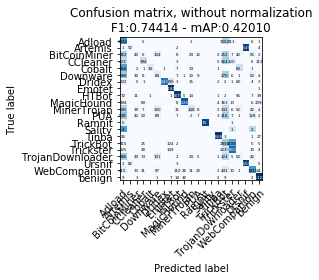

In [15]:
# # last result
# clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs = -1, max_features="auto")
# cv_results = clf.fit(X_train_scaled, y_train)
# yPred = clf.predict(X_val_scaled)
# print("Training Score: \t{:.5f}".format(clf.score(X_train_scaled, y_train)))
# print("Validation Score: \t{:.5f}".format(clf.score(X_val_scaled, y_val)))
# conf_mat = confusion_matrix(y_true=y_val, y_pred=yPred)
# print (conf_mat)
    
    
# # Plot normalized confusion matrix
# plot_confusion_matrix(directory=save_dir, y_true=y_val, y_pred=yPred, 
#                             classes=class_names, 
#                             normalize=False)

Training Score: 	0.93547
Validation Score: 	0.77638
[[ 2398     1    49   129    13    25     6     0     1    43    11    98
      0     0     1   132   106     5     0    40     0]
 [    0   825     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0   822     0     1]
 [    4     0    24     4   136   188    49     0    12     0   206    57
      0     0     0     9     0    78     0    44     4]
 [  104     0    20   729     1    11     0     0     2   512     8    28
      0     1     3   100    79     3     0     9    18]
 [    4     0   141     0    38     0    55     0    19     0    17     0
      0     0     0     0     0     1     0     1     0]
 [    8     0   162     3     0    19     0     0     6     4    94   353
      0     0     0     8     3    37     0    69     4]
 [    2     0   142     0    45     0  1616     0    18     0    15     0
      1     0     0     0     0     1     0     1     1]
 [    0     0     0     0     0

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Naor\\Desktop\\cyber\\NetMLnew\\NetML-Competition2020/results/20210428-132119/CM.png'

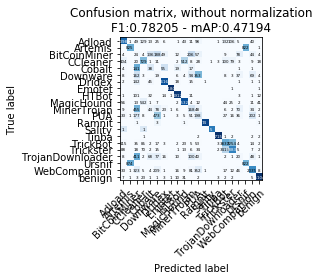

In [17]:
# last result
clf = ExtraTreesClassifier()
cv_results = clf.fit(X_train_scaled, y_train)
yPred = clf.predict(X_val_scaled)
print("Training Score: \t{:.5f}".format(clf.score(X_train_scaled, y_train)))
print("Validation Score: \t{:.5f}".format(clf.score(X_val_scaled, y_val)))
conf_mat = confusion_matrix(y_true=y_val, y_pred=yPred)
print (conf_mat)
    
    
# Plot normalized confusion matrix
plot_confusion_matrix(directory=save_dir, y_true=y_val, y_pred=yPred, 
                            classes=class_names, 
                            normalize=False)

In [ ]:
# Make submission with JSON format
if submit == "test-std" or submit == "both":
    do_submit(clf, test_set, scaler, class_label_pair, save_dir+"/submission_test-std.json")
if submit == "test-challenge" or submit == "both":
    do_submit(clf, challenge_set, scaler, class_label_pair, save_dir+"/submission_test-challenge.json")
